# This notebook is contributed by Venkatasubramanian Narasimman 

In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import requests, zipfile, io

## Data pipeline to fetch data directly from the source site

In [2]:
if(not os.path.exists('competition_data')):
    os.mkdir('competition_data')
    req = requests.get("https://cricsheet.org/downloads/ipl_male_csv2.zip") 
    z = zipfile.ZipFile(io.BytesIO(req.content))
    z.extractall("competition_data/ipl")

In [3]:
path_of_the_directory = 'competition_data/'
ext = ('_info.csv')
match_info = pd.DataFrame(columns=["Team1","Team2","date","venue","toss_winner","toss_decision","match_winner",])
def checkValidMatch(reader):
  startDate = "2018/04/06"
  endDate = "2020/11/11"
  curDate = ""
  attributes = []
  return_val = False
  for row in reader:
    #print("inside for")
    #print(row)
    #if(row[1]==)
    if(row[0] == 'info' and row[1]=='team'):
      #print("passed team")
      attributes.append(row[2])
      #print(attributes)
    if(row[0] == 'info' and row[1]=='date'):
      #print("passed team")
      attributes.append(row[2])
    if(row[0] == 'info' and row[1]=='venue'):
      #print("passed venue")
      attributes.append(row[2])
      #print(attributes)
    if(row[0] == 'info' and row[1]=='toss_winner'):
      #print("passed toss_winner")
      attributes.append(row[2])
      #print(attributes)
    if(row[0] == 'info' and row[1]=='toss_decision'):
      #print("passed toss_decision")
      attributes.append(row[2])
      #print(attributes)
    if(row[0] == 'info' and row[1]=='winner'):
      #print("passed winner",row[2])
      attributes.append(row[2])
      #print(attributes)
    if(row[0] == 'info' and row[1] == "date"):
      if(row[2] >= startDate and row[2] <= endDate):
        return_val = True
      else: 
        return_val = False
  if(len(attributes)==7):
    match_info.loc[len(match_info)-1] = attributes
  return return_val

teamsheet = pd.DataFrame(columns=["Team1","Team2","date","venue","toss_winner","toss_decision","match_winner",])
def create_teamsheet(reader):
  return teamsheet
for competitions in os.listdir(path_of_the_directory):
  competition_dir = path_of_the_directory + competitions +'/'
  comp_bbb_data = []
  for files in os.listdir(competition_dir):
    if files.endswith(ext):
      with open(competition_dir + files, 'r') as matchfile:
        reader = csv.reader(matchfile)
        if(checkValidMatch(reader)):
          matchfile.seek(0)
          filename = files.split("_")[0]+".csv"
          print(competition_dir+filename)
          comp_bbb_data.append(pd.read_csv(competition_dir+filename, index_col=None, header=0))
    else:
        continue
  comp_bbb_data = pd.concat(comp_bbb_data, axis=0, ignore_index=True)
  #comp_bbb_data.to_csv(competitions+'_bbb_data.csv')
  #match_info.to_csv("match_info.csv")

competition_data/ipl/1178418.csv
competition_data/ipl/1178419.csv
competition_data/ipl/1136571.csv
competition_data/ipl/1136570.csv
competition_data/ipl/1136594.csv
competition_data/ipl/1136595.csv
competition_data/ipl/1178426.csv
competition_data/ipl/1178427.csv
competition_data/ipl/1181768.csv
competition_data/ipl/1216502.csv
competition_data/ipl/1216503.csv
competition_data/ipl/1136620.csv
competition_data/ipl/1216498.csv
competition_data/ipl/1216499.csv
competition_data/ipl/1136615.csv
competition_data/ipl/1216536.csv
competition_data/ipl/1216537.csv
competition_data/ipl/1136614.csv
competition_data/ipl/1178412.csv
competition_data/ipl/1178413.csv
competition_data/ipl/1216492.csv
competition_data/ipl/1216493.csv
competition_data/ipl/1216508.csv
competition_data/ipl/1216509.csv
competition_data/ipl/1216541.csv
competition_data/ipl/1216540.csv
competition_data/ipl/1136566.csv
competition_data/ipl/1136567.csv
competition_data/ipl/1136608.csv
competition_data/ipl/1136609.csv
competitio

In [4]:
path_of_the_directory = 'competition_data/'
ext = ('_info.csv')

def create_teamsheet(reader):
  teamsheet = pd.DataFrame(columns=["Team","date","player1","player2","player3","player4","player5","player6","player7","player8","player9","player10","player11"])
  team1 = []
  team2 = []
  rownum=0
  for row in reader:
    rownum+=1
    #print(row)
    if(row[0]=="info" and row[1]=="team" and rownum==3):
      team1.append(row[2])
    if(row[0]=="info" and row[1]=="team" and rownum==4):
      team2.append(row[2])
    if(row[0]=="info" and row[1]=="date"):
      team1.append(row[2])
      team2.append(row[2])
    if(row[0]=="info" and row[1]=="player" and row[2]==team1[0]):
      team1.append(row[3])
    if(row[0]=="info" and row[1]=="player" and row[2]==team2[0]):
      team2.append(row[3])
  #print(team1)
  #print(team2)
  if(len(team1)==teamsheet.shape[1]):
    teamsheet.loc[len(teamsheet)-1] = team1
  if(len(team2)==teamsheet.shape[1]):
    teamsheet.loc[len(teamsheet)-1] = team2
  print(teamsheet)
  return teamsheet

teamsheet_final = pd.DataFrame(columns=["Team","date","player1","player2","player3","player4","player5","player6","player7","player8","player9","player10","player11"])
for competitions in os.listdir(path_of_the_directory):
  competition_dir = path_of_the_directory + competitions +'/'
  for files in os.listdir(competition_dir):
    if files.endswith(ext):
      with open(competition_dir + files, 'r') as matchfile:
        #print(matchfile)
        reader = csv.reader(matchfile)
        teamsheet_final = pd.concat([teamsheet_final,create_teamsheet(reader)])
    else:
        continue

                           Team        date    player1      player2  \
-1             Rajasthan Royals  2014/04/26  AM Rahane      KK Nair   
 0  Royal Challengers Bangalore  2014/04/26   PA Patel  YV Takawale   

      player3       player4         player5    player6    player7   player8  \
-1  SV Samson      AM Nayar       SR Watson  STR Binny  SPD Smith  R Bhatia   
 0    V Kohli  Yuvraj Singh  AB de Villiers     S Rana  JA Morkel  MA Starc   

          player9  player10    player11  
-1  KW Richardson  PV Tambe  TG Southee  
 0      R Rampaul  AB Dinda   YS Chahal  
                           Team        date      player1     player2  \
-1  Royal Challengers Bangalore  2009/04/29    JH Kallis  SP Goswami   
 0        Kolkata Knight Riders  2009/04/29  BB McCullum    CH Gayle   

         player3     player4     player5           player6    player7  \
-1  KP Pietersen     V Kohli  MV Boucher  RE van der Merwe  MK Pandey   
 0      BJ Hodge  SC Ganguly  MN van Wyk           WP Saha 

                Team        date      player1    player2           player3  \
-1  Delhi Daredevils  2013/04/06    DA Warner  UBT Chand  DPMD Jayawardene   
 0  Rajasthan Royals  2013/04/06  MDKJ Perera  AM Rahane          R Dravid   

      player4     player5    player6     player7      player8   player9  \
-1  MC Juneja  AD Russell    J Botha   IK Pathan      NV Ojha   A Nehra   
 0  STR Binny    BJ Hodge  KK Cooper  AL Menaria  S Sreesanth  R Shukla   

      player10  player11  
-1    S Nadeem  UT Yadav  
 0  SK Trivedi  S Badree  
                   Team        date      player1          player2  \
-1  Sunrisers Hyderabad  2022/05/22      PK Garg  Abhishek Sharma   
 0         Punjab Kings  2022/05/22  JM Bairstow         S Dhawan   

            player3     player4         player5            player6  \
-1      RA Tripathi  AK Markram        N Pooran  Washington Sundar   
 0  M Shahrukh Khan  MA Agarwal  LS Livingstone          JM Sharma   

       player7        player8   player9

                           Team        date   player1      player2  \
-1                Gujarat Lions  2016/04/24  DR Smith  BB McCullum   
 0  Royal Challengers Bangalore  2016/04/24   V Kohli    SR Watson   

           player3     player4    player5    player6    player7  \
-1        SK Raina  KD Karthik  RA Jadeja   DJ Bravo   AJ Finch   
 0  AB de Villiers    KL Rahul    SN Khan  KM Jadhav  STR Binny   

          player8      player9       player10  player11  
-1        P Kumar  DS Kulkarni      SB Jakati  PV Tambe  
 0  Iqbal Abdulla    YS Chahal  KW Richardson  T Shamsi  
               Team        date   player1       player2     player3  \
-1   Mumbai Indians  2010/04/03  S Dhawan  SR Tendulkar   SS Tiwary   
 0  Deccan Chargers  2010/04/03  HH Gibbs  AC Gilchrist  VVS Laxman   

      player4    player5     player6    player7    player8          player9  \
-1   DJ Bravo  AT Rayudu  KA Pollard  R Sathish  R McLaren  Harbhajan Singh   
 0  A Symonds  RG Sharma   MD Mishra   TL

                Team        date        player1   player2       player3  \
-1  Delhi Daredevils  2012/04/19        NV Ojha  V Sehwag  KP Pietersen   
 0   Deccan Chargers  2012/04/19  KC Sangakkara  S Dhawan      PA Patel   

             player4      player5    player6          player7     player8  \
-1  DPMD Jayawardene  LRPL Taylor  IK Pathan          Y Nagar  AB Agarkar   
 0      DT Christian    JP Duminy   B Chipli  AA Jhunjhunwala    DW Steyn   

     player9      player10        player11  
-1  M Morkel      UT Yadav        S Nadeem  
 0  A Mishra  Ankit Sharma  V Pratap Singh  
                   Team        date      player1   player2       player3  \
-1  Sunrisers Hyderabad  2015/05/17    DA Warner  S Dhawan  MC Henriques   
 0       Mumbai Indians  2015/05/17  LMP Simmons  PA Patel     RG Sharma   

       player4     player5    player6          player7         player8  \
-1  EJG Morgan    KL Rahul    NV Ojha        KV Sharma  A Ashish Reddy   
 0   AT Rayudu  KA Pollard  HH

                           Team        date   player1       player2  player3  \
-1  Royal Challengers Bangalore  2020/10/12  AJ Finch    D Padikkal  V Kohli   
 0        Kolkata Knight Riders  2020/10/12  T Banton  Shubman Gill   N Rana   

           player4     player5            player6      player7     player8  \
-1  AB de Villiers   CH Morris  Washington Sundar       S Dube     I Udana   
 0      EJG Morgan  KD Karthik         AD Russell  RA Tripathi  PJ Cummins   

         player9   player10           player11  
-1      NA Saini  YS Chahal     Mohammed Siraj  
 0  KL Nagarkoti   CV Varun  M Prasidh Krishna  
                     Team        date   player1    player2   player3  \
-1  Kolkata Knight Riders  2022/04/28  AJ Finch    VR Iyer   SS Iyer   
 0         Delhi Capitals  2022/04/28   PP Shaw  DA Warner  MR Marsh   

        player4    player5   player6     player7    player8        player9  \
-1  B Indrajith  SP Narine    N Rana  AD Russell   RK Singh       UT Yadav   
 0  

                Team        date           player1    player2        player3  \
-1   Kings XI Punjab  2013/05/16      AC Gilchrist   SE Marsh  Azhar Mahmood   
 0  Delhi Daredevils  2013/05/16  DPMD Jayawardene  UBT Chand      IK Pathan   

      player4    player5    player6        player7   player8  player9  \
-1  DA Miller  R Sathish  PP Chawla  Mandeep Singh   M Vohra  P Kumar   
 0  DA Warner   V Sehwag  BJ Rohrer      CM Gautam  M Morkel   S Kaul   

    player10        player11  
-1   P Awana  Sandeep Sharma  
 0  UT Yadav         A Nehra  
                           Team        date    player1   player2  player3  \
-1              Kings XI Punjab  2014/04/28  CA Pujara  V Sehwag  WP Saha   
 0  Royal Challengers Bangalore  2014/04/28   CH Gayle  PA Patel  V Kohli   

        player4         player5       player6    player7     player8  \
-1   GJ Maxwell       DA Miller     GJ Bailey   R Dhawan  MG Johnson   
 0  YV Takawale  AB de Villiers  Yuvraj Singh  JA Morkel    MA Starc  

                           Team        date          player1        player2  \
-1  Royal Challengers Bangalore  2022/05/08          V Kohli   F du Plessis   
 0          Sunrisers Hyderabad  2022/05/08  Abhishek Sharma  KS Williamson   

        player3     player4     player5    player6         player7  \
-1   RM Patidar  GJ Maxwell  KD Karthik  MK Lomror   Shahbaz Ahmed   
 0  RA Tripathi  AK Markram    N Pooran  J Suchith  Shashank Singh   

         player8   player9      player10          player11  
-1  PWH de Silva  HV Patel  JR Hazlewood    Mohammed Siraj  
 0  Kartik Tyagi   B Kumar   Umran Malik  Fazalhaq Farooqi  
                     Team        date       player1        player2    player3  \
-1        Kings XI Punjab  2013/04/16  AC Gilchrist  Mandeep Singh    M Vohra   
 0  Kolkata Knight Riders  2013/04/16      MS Bisla      G Gambhir  JH Kallis   

       player4    player5        player6          player7   player8  \
-1   DJ Hussey  DA Miller  Azhar Mahmood  Gurkeerat S

                   Team        date    player1      player2        player3  \
-1  Sunrisers Hyderabad  2018/04/29   AD Hales     S Dhawan  KS Williamson   
 0     Rajasthan Royals  2018/04/29  AM Rahane  RA Tripathi      SV Samson   

      player4          player5    player6    player7      player8  \
-1  MK Pandey  Shakib Al Hasan  YK Pathan    WP Saha  Rashid Khan   
 0  BA Stokes       JC Buttler  MK Lomror  K Gowtham    JC Archer   

         player9        player10    player11  
-1  Basil Thampi  Sandeep Sharma      S Kaul  
 0   DS Kulkarni        IS Sodhi  JD Unadkat  
                    Team        date    player1    player2   player3  \
-1  Lucknow Super Giants  2022/05/01  Q de Kock   KL Rahul  DJ Hooda   
 0        Delhi Capitals  2022/05/01    PP Shaw  DA Warner  MR Marsh   

       player4      player5   player6    player7          player8  \
-1  MP Stoinis    KH Pandya  A Badoni  JO Holder  Mohsin Khan (2)   
 0     RR Pant  Lalit Yadav  R Powell   AR Patel        SN Th

                   Team        date     player1       player2     player3  \
-1       Mumbai Indians  2022/04/21   RG Sharma  Ishan Kishan    D Brevis   
 0  Chennai Super Kings  2022/04/21  RD Gaikwad    RV Uthappa  MJ Santner   

      player4      player5     player6     player7      player8     player9  \
-1   SA Yadav  Tilak Varma  HR Shokeen  KA Pollard      DR Sams  JD Unadkat   
 0  AT Rayudu       S Dube   RA Jadeja    MS Dhoni  D Pretorius    DJ Bravo   

            player10      player11  
-1       RP Meredith     JJ Bumrah  
 0  Mukesh Choudhary  M Theekshana  
                     Team        date    player1   player2    player3  \
-1  Kolkata Knight Riders  2014/04/29  G Gambhir  MS Bisla  JH Kallis   
 0       Rajasthan Royals  2014/04/29  AM Rahane   KK Nair  SV Samson   

      player4    player5          player6      player7        player8  \
-1  MK Pandey   SA Yadav  Shakib Al Hasan   RV Uthappa  R Vinay Kumar   
 0  SR Watson  STR Binny        SPD Smith  JP Faulkne

                   Team        date  player1    player2   player3    player4  \
-1     Rajasthan Royals  2010/03/28  MJ Lumb    NV Ojha  FY Fazal  YK Pathan   
 0  Chennai Super Kings  2010/03/28  M Vijay  ML Hayden  SK Raina   MS Dhoni   

        player5          player6          player7     player8  \
-1     AC Voges  AA Jhunjhunwala          P Dogra    S Narwal   
 0  S Badrinath        JA Morkel  KB Arun Karthik  T Thushara   

            player9        player10    player11  
-1         SK Warne         SW Tait  SK Trivedi  
 0  Joginder Sharma  M Muralitharan   SB Jakati  
                           Team        date    player1   player2  \
-1               Mumbai Indians  2016/04/20  RG Sharma  PA Patel   
 0  Royal Challengers Bangalore  2016/04/20    V Kohli  KL Rahul   

           player3     player4     player5    player6    player7  \
-1       AT Rayudu  JC Buttler  KA Pollard  HH Pandya  KH Pandya   
 0  AB de Villiers   SR Watson     TM Head    SN Khan  STR Binny   

   

                Team        date           player1       player2     player3  \
-1  Delhi Daredevils  2013/04/21  DPMD Jayawardene      V Sehwag   DA Warner   
 0    Mumbai Indians  2013/04/21          DR Smith  SR Tendulkar  KD Karthik   

            player4     player5           player6     player7  \
-1  Y Venugopal Rao   KM Jadhav  RE van der Merwe   IK Pathan   
 0        RG Sharma  KA Pollard         AT Rayudu  RT Ponting   

            player8     player9  player10    player11  
-1       AD Russell  AB Agarkar  S Nadeem    UT Yadav  
 0  Harbhajan Singh   JJ Bumrah  MM Patel  SL Malinga  
                   Team        date       player1     player2    player3  \
-1  Chennai Super Kings  2012/05/23       M Vijay  MEK Hussey   SK Raina   
 0       Mumbai Indians  2012/05/23  SR Tendulkar    DR Smith  RG Sharma   

        player4       player5    player6     player7          player8  \
-1  S Badrinath      MS Dhoni  RA Jadeja    DJ Bravo        JA Morkel   
 0   KD Karthik  JEC

                           Team        date    player1    player2    player3  \
-1  Royal Challengers Bangalore  2010/03/23  MK Pandey  JH Kallis   R Dravid   
 0          Chennai Super Kings  2010/03/23   PA Patel  ML Hayden  GJ Bailey   

       player4  player5      player6     player7   player8   player9  \
-1  RV Uthappa  V Kohli   EJG Morgan  MV Boucher   P Kumar  A Kumble   
 0    SK Raina  M Vijay  S Badrinath   JA Morkel  R Ashwin  L Balaji   

          player10       player11  
-1        DW Steyn  R Vinay Kumar  
 0  M Muralitharan        S Tyagi  
                     Team        date   player1       player2    player3  \
-1         Mumbai Indians  2010/03/22  S Dhawan  SR Tendulkar  SS Tiwary   
 0  Kolkata Knight Riders  2010/03/22  CH Gayle    SC Ganguly    OA Shah   

       player4    player5        player6   player7    player8  \
-1  KA Pollard  R Sathish        AP Tare  DJ Bravo  R McLaren   
 0  AD Mathews  CA Pujara  Mandeep Singh   WP Saha   M Kartik   

         

                   Team        date     player1  player2     player3  \
-1  Chennai Super Kings  2013/05/21  MEK Hussey  M Vijay    SK Raina   
 0       Mumbai Indians  2013/05/21    DR Smith  AP Tare  KD Karthik   

      player4     player5      player6          player7     player8  \
-1   MS Dhoni   RA Jadeja  S Badrinath         DJ Bravo   JA Morkel   
 0  RG Sharma  KA Pollard    AT Rayudu  Harbhajan Singh  MG Johnson   

       player9  player10   player11  
-1   CH Morris  R Ashwin  MM Sharma  
 0  SL Malinga   PP Ojha   MM Patel  
                     Team        date  player1    player2        player3  \
-1    Sunrisers Hyderabad  2018/05/25  WP Saha   S Dhawan  KS Williamson   
 0  Kolkata Knight Riders  2018/05/25  CA Lynn  SP Narine         N Rana   

            player4     player5       player6        player7      player8  \
-1  Shakib Al Hasan    DJ Hooda     YK Pathan  CR Brathwaite  Rashid Khan   
 0       RV Uthappa  KD Karthik  Shubman Gill     AD Russell    PP Chawl

                           Team        date      player1     player2  \
-1  Royal Challengers Bangalore  2020/11/02  JR Philippe  D Padikkal   
 0               Delhi Capitals  2020/11/02      PP Shaw    S Dhawan   

      player3         player4    player5     player6            player7  \
-1    V Kohli  AB de Villiers  CH Morris      S Dube  Washington Sundar   
 0  AM Rahane         SS Iyer    RR Pant  MP Stoinis           AR Patel   

    player8        player9        player10   player11  
-1  I Udana  Shahbaz Ahmed  Mohammed Siraj  YS Chahal  
 0  DR Sams       R Ashwin        K Rabada   A Nortje  
                     Team        date     player1    player2    player3  \
-1  Kolkata Knight Riders  2015/05/09  RV Uthappa  G Gambhir  MK Pandey   
 0        Kings XI Punjab  2015/05/09     M Vijay    M Vohra    WP Saha   

       player4    player5          player6    player7    player8  \
-1    SA Yadav  YK Pathan       AD Russell    J Botha  PP Chawla   
 0  GJ Maxwell  DA Miller  

                   Team        date    player1    player2    player3  \
-1       Mumbai Indians  2020/11/03  RG Sharma  Q de Kock   SA Yadav   
 0  Sunrisers Hyderabad  2020/11/03  DA Warner    WP Saha  MK Pandey   

          player4    player5    player6      player7          player8  \
-1   Ishan Kishan  KH Pandya  SS Tiwary   KA Pollard  NM Coulter-Nile   
 0  KS Williamson    PK Garg  JO Holder  Abdul Samad      Rashid Khan   

         player9        player10     player11  
-1  JL Pattinson     DS Kulkarni    RD Chahar  
 0      S Nadeem  Sandeep Sharma  T Natarajan  
                           Team        date       player1      player2  \
-1        Kolkata Knight Riders  2020/10/21  Shubman Gill  RA Tripathi   
 0  Royal Challengers Bangalore  2020/10/21    D Padikkal     AJ Finch   

            player3   player4         player5     player6            player7  \
-1           N Rana  T Banton      KD Karthik  EJG Morgan         PJ Cummins   
 0  Gurkeerat Singh   V Kohli  AB de

                   Team        date    player1      player2    player3  \
-1     Delhi Daredevils  2015/05/12  Q de Kock      SS Iyer  JP Duminy   
 0  Chennai Super Kings  2015/05/12   DR Smith  BB McCullum   SK Raina   

         player4    player5    player6    player7    player8    player9  \
-1  Yuvraj Singh  JA Morkel  KM Jadhav  SS Tiwary    J Yadav  GS Sandhu   
 0  F du Plessis   MS Dhoni   DJ Bravo     P Negi  RA Jadeja   R Ashwin   

     player10   player11  
-1     Z Khan   S Nadeem  
 0  MM Sharma  IC Pandey  
                     Team        date       player1  player2        player3  \
-1    Sunrisers Hyderabad  2021/10/03        JJ Roy  WP Saha  KS Williamson   
 0  Kolkata Knight Riders  2021/10/03  Shubman Gill  VR Iyer    RA Tripathi   

    player4          player5      player6          player7      player8  \
-1  PK Garg  Abhishek Sharma  Abdul Samad        JO Holder  Rashid Khan   
 0   N Rana       KD Karthik   EJG Morgan  Shakib Al Hasan    SP Narine   

      

                   Team        date          player1        player2  \
-1  Chennai Super Kings  2022/05/01       RD Gaikwad      DP Conway   
 0  Sunrisers Hyderabad  2022/05/01  Abhishek Sharma  KS Williamson   

        player3     player4     player5         player6            player7  \
-1     MS Dhoni   RA Jadeja  RV Uthappa       AT Rayudu    Simarjeet Singh   
 0  RA Tripathi  AK Markram    N Pooran  Shashank Singh  Washington Sundar   

       player8      player9          player10      player11  
-1  MJ Santner  D Pretorius  Mukesh Choudhary  M Theekshana  
 0    M Jansen      B Kumar       T Natarajan   Umran Malik  
                    Team        date      player1     player2    player3  \
-1      Rajasthan Royals  2022/05/15  YBK Jaiswal  JC Buttler  SV Samson   
 0  Lucknow Super Giants  2022/05/15    Q de Kock    KL Rahul   A Badoni   

       player4    player5      player6    player7       player8  \
-1  D Padikkal    R Parag  JDS Neesham   R Ashwin      TA Boult   
 0

                   Team        date    player1    player2        player3  \
-1     Rajasthan Royals  2018/04/09  AM Rahane  DJM Short      SV Samson   
 0  Sunrisers Hyderabad  2018/04/09    WP Saha   S Dhawan  KS Williamson   

      player4      player5     player6          player7      player8  \
-1  BA Stokes  RA Tripathi  JC Buttler        K Gowtham      S Gopal   
 0  MK Pandey     DJ Hooda   YK Pathan  Shakib Al Hasan  Rashid Khan   

        player9    player10    player11  
-1  DS Kulkarni  JD Unadkat  B Laughlin  
 0      B Kumar  B Stanlake      S Kaul  
                     Team        date   player1    player2     player3  \
-1  Kolkata Knight Riders  2010/03/16  BJ Hodge  MK Tiwary  SC Ganguly   
 0    Chennai Super Kings  2010/03/16   M Vijay  ML Hayden    SK Raina   

        player4   player5     player6    player7      player8   player9  \
-1      WP Saha   OA Shah  AD Mathews  LR Shukla  RS Gavaskar   SE Bond   
 0  S Badrinath  MS Dhoni     JM Kemp  JA Morkel     R 

                    Team        date      player1    player2   player3  \
-1  Kochi Tuskers Kerala  2011/04/30  BB McCullum  M Klinger  PA Patel   
 0      Delhi Daredevils  2011/04/30    DA Warner   V Sehwag   NV Ojha   

             player4   player5    player6    player7           player8  \
-1  DPMD Jayawardene  BJ Hodge  RA Jadeja    B Akhil     R Vinay Kumar   
 0   Y Venugopal Rao   Y Nagar    TR Birt  IK Pathan  RE van der Merwe   

     player9     player10  player11  
-1  RR Powar  S Sreesanth  RP Singh  
 0  M Morkel   AB Agarkar  UT Yadav  
                           Team        date        player1        player2  \
-1               Mumbai Indians  2008/04/20       L Ronchi  ST Jayasuriya   
 0  Royal Challengers Bangalore  2008/04/20  S Chanderpaul       R Dravid   

        player3     player4  player5     player6     player7          player8  \
-1  DJ Thornely  RV Uthappa  PR Shah    AM Nayar  SM Pollock  Harbhajan Singh   
 0  LRPL Taylor   JH Kallis  V Kohli  MV Bouch

                Team        date      player1       player2    player3  \
-1  Rajasthan Royals  2022/05/29  YBK Jaiswal    JC Buttler  SV Samson   
 0    Gujarat Titans  2022/05/29      WP Saha  Shubman Gill    MS Wade   

       player4     player5    player6      player7        player8  \
-1  D Padikkal  SO Hetmyer   R Ashwin      R Parag       TA Boult   
 0   HH Pandya   DA Miller  R Tewatia  Rashid Khan  R Sai Kishore   

        player9           player10        player11  
-1     OC McCoy  M Prasidh Krishna       YS Chahal  
 0  LH Ferguson         Yash Dayal  Mohammed Shami  
                   Team        date    player1       player2   player3  \
-1      Kings XI Punjab  2018/05/20   KL Rahul      CH Gayle  AJ Finch   
 0  Chennai Super Kings  2018/05/20  AT Rayudu  F du Plessis  SK Raina   

        player4          player5    player6   player7   player8    player9  \
-1    MK Tiwary        DA Miller    KK Nair  AR Patel  R Ashwin     AJ Tye   
 0  SW Billings  Harbhajan Sing

                      Team        date    player1      player2        player3  \
-1     Sunrisers Hyderabad  2017/05/06  DA Warner     S Dhawan  KS Williamson   
 0  Rising Pune Supergiant  2017/05/06  AM Rahane  RA Tripathi      SPD Smith   

         player4       player5       player6       player7            player8  \
-1  Yuvraj Singh  MC Henriques       NV Ojha  Bipul Sharma        Rashid Khan   
 0     BA Stokes      MS Dhoni  DT Christian     MK Tiwary  Washington Sundar   

      player9    player10     player11  
-1    B Kumar      S Kaul      A Nehra  
 0  SN Thakur  JD Unadkat  Imran Tahir  
                Team        date      player1   player2     player3  \
-1  Delhi Daredevils  2017/05/06    SV Samson   KK Nair     SS Iyer   
 0    Mumbai Indians  2017/05/06  LMP Simmons  PA Patel  KA Pollard   

      player4      player5     player6     player7          player8  \
-1    RR Pant  CJ Anderson  MN Samuels  PJ Cummins         K Rabada   
 0  RG Sharma    HH Pandya      N

                           Team        date       player1  player2  \
-1  Royal Challengers Bangalore  2021/10/11    D Padikkal  V Kohli   
 0        Kolkata Knight Riders  2021/10/11  Shubman Gill  VR Iyer   

        player3     player4         player5        player6       player7  \
-1    KS Bharat  GJ Maxwell  AB de Villiers  Shahbaz Ahmed  DT Christian   
 0  RA Tripathi      N Rana       SP Narine     KD Karthik    EJG Morgan   

            player8      player9        player10   player11  
-1         HV Patel   GHS Garton  Mohammed Siraj  YS Chahal  
 0  Shakib Al Hasan  LH Ferguson     Shivam Mavi   CV Varun  
                           Team        date   player1  player2  \
-1  Royal Challengers Bangalore  2016/05/18  CH Gayle  V Kohli   
 0              Kings XI Punjab  2016/05/18   M Vijay  HM Amla   

           player3    player4          player5      player6      player7  \
-1  AB de Villiers   KL Rahul        SR Watson  Sachin Baby    STR Binny   
 0         WP Saha  DA 

                     Team        date     player1   player2        player3  \
-1           Punjab Kings  2022/04/01  MA Agarwal  S Dhawan  PBB Rajapaksa   
 0  Kolkata Knight Riders  2022/04/01   AM Rahane   VR Iyer        SS Iyer   

           player4  player5          player6        player7     player8  \
-1  LS Livingstone  RA Bawa  M Shahrukh Khan  Harpreet Brar    OF Smith   
 0     SW Billings   N Rana       AD Russell      SP Narine  TG Southee   

      player9  player10        player11  
-1  RD Chahar  K Rabada  Arshdeep Singh  
 0   UT Yadav  CV Varun     Shivam Mavi  
               Team        date    player1       player2        player3  \
-1  Deccan Chargers  2011/04/24    S Sohal      S Dhawan  KC Sangakkara   
 0   Mumbai Indians  2011/04/24  DJ Jacobs  SR Tendulkar      AT Rayudu   

       player4    player5       player6       player7          player8  \
-1    CL White   B Chipli  DT Christian  DB Ravi Teja         A Mishra   
 0  KA Pollard  RG Sharma     A Symonds

                Team        date     player1       player2    player3  \
-1   Deccan Chargers  2010/04/05  VVS Laxman  AC Gilchrist  RG Sharma   
 0  Rajasthan Royals  2010/04/05     MJ Lumb       NV Ojha   FY Fazal   

      player4        player5          player6      player7    player8  \
-1  A Symonds  Anirudh Singh         DR Smith  AA Bilakhia  RJ Harris   
 0  SR Watson      YK Pathan  AA Jhunjhunwala      AS Raut   SK Warne   

     player9       player10    player11  
-1  RP Singh  Harmeet Singh     PP Ojha  
 0  M Morkel        AP Dole  SK Trivedi  
                           Team        date   player1   player2  \
-1  Royal Challengers Bangalore  2019/04/24  PA Patel   V Kohli   
 0              Kings XI Punjab  2019/04/24  KL Rahul  CH Gayle   

           player3    player4   player5        player6            player7  \
-1  AB de Villiers     MM Ali   AD Nath     MP Stoinis  Washington Sundar   
 0      MA Agarwal  DA Miller  N Pooran  Mandeep Singh           R Ashwin   



                           Team        date   player1     player2  \
-1          Sunrisers Hyderabad  2019/05/04   WP Saha  MJ Guptill   
 0  Royal Challengers Bangalore  2019/05/04  PA Patel     V Kohli   

           player3        player4          player5          player6  \
-1       MK Pandey  KS Williamson        V Shankar        YK Pathan   
 0  AB de Villiers     SO Hetmyer  Gurkeerat Singh  C de Grandhomme   

              player7      player8       player9   player10      player11  
-1      Mohammad Nabi  Rashid Khan       B Kumar   KK Ahmed  Basil Thampi  
 0  Washington Sundar     UT Yadav  K Khejroliya  YS Chahal      NA Saini  
                Team        date    player1     player2  player3      player4  \
-1   Kings XI Punjab  2016/05/07    M Vijay  MP Stoinis  HM Amla      WP Saha   
 0  Delhi Daredevils  2016/05/07  Q de Kock   SV Samson  KK Nair  SW Billings   

          player5    player6   player7          player8         player9  \
-1     GJ Maxwell  DA Miller  A

                           Team        date    player1  player2  \
-1             Delhi Daredevils  2016/05/22  Q de Kock  RR Pant   
 0  Royal Challengers Bangalore  2016/05/22   CH Gayle  V Kohli   

           player3    player4      player5    player6        player7  \
-1         KK Nair  SV Samson  SW Billings     P Negi  CR Brathwaite   
 0  AB de Villiers   KL Rahul    SR Watson  STR Binny    Sachin Baby   

      player8        player9   player10   player11  
-1  CH Morris        J Yadav   A Mishra     Z Khan  
 0  CJ Jordan  Iqbal Abdulla  S Aravind  YS Chahal  
                     Team        date     player1    player2       player3  \
-1       Delhi Daredevils  2014/05/07   Q de Kock    M Vijay  KP Pietersen   
 0  Kolkata Knight Riders  2014/05/07  RV Uthappa  G Gambhir     MK Pandey   

       player4          player5    player6           player7     player8  \
-1  KD Karthik        JP Duminy  LR Shukla         KM Jadhav  WD Parnell   
 0   JH Kallis  Shakib Al Hasan  YK

                           Team        date    player1   player2  \
-1          Sunrisers Hyderabad  2015/05/15  DA Warner  S Dhawan   
 0  Royal Challengers Bangalore  2015/05/15   CH Gayle   V Kohli   

           player3        player4     player5   player6       player7  \
-1    MC Henriques     EJG Morgan     NV Ojha  KL Rahul  Bipul Sharma   
 0  AB de Villiers  Mandeep Singh  KD Karthik   SN Khan       D Wiese   

      player8   player9   player10  player11  
-1  KV Sharma   B Kumar    P Kumar  DW Steyn  
 0   MA Starc  HV Patel  YS Chahal  AB Dinda  
                   Team        date     player1   player2    player3  \
-1     Rajasthan Royals  2011/05/09   SR Watson  R Dravid  AM Rahane   
 0  Chennai Super Kings  2011/05/09  MEK Hussey   M Vijay   SK Raina   

        player4     player5      player6   player7    player8   player9  \
-1  LRPL Taylor  AL Menaria      J Botha   AS Raut  DH Yagnik   A Singh   
 0     MS Dhoni   JA Morkel  S Badrinath  DJ Bravo    WP Saha  R As

                   Team        date    player1    player2        player3  \
-1  Chennai Super Kings  2009/05/20  GJ Bailey   PA Patel       SK Raina   
 0      Kings XI Punjab  2009/05/20    S Sohal  SM Katich  LA Pomersbach   

         player4        player5   player6    player7   player8     player9  \
-1   S Badrinath       MS Dhoni  JDP Oram    MS Gony  R Ashwin  T Thushara   
 0  Yuvraj Singh  KC Sangakkara   WA Mota  IK Pathan     B Lee   PP Chawla   

    player10        player11  
-1  L Balaji  M Muralitharan  
 0  RR Powar     S Sreesanth  
                   Team        date    player1      player2        player3  \
-1  Sunrisers Hyderabad  2016/05/06  DA Warner     S Dhawan  KS Williamson   
 0        Gujarat Lions  2016/05/06   DR Smith  BB McCullum       SK Raina   

         player4       player5   player6    player7  player8     player9  \
-1  MC Henriques  Yuvraj Singh  DJ Hooda    NV Ojha  B Kumar     BB Sran   
 0    KD Karthik      AJ Finch  DJ Bravo  RA Jadeja  P K

                           Team        date    player1    player2     player3  \
-1  Royal Challengers Bangalore  2010/03/18  MK Pandey  JH Kallis  RV Uthappa   
 0             Rajasthan Royals  2010/03/18    NV Ojha    MJ Lumb   DR Martyn   

            player4    player5     player6     player7   player8   player9  \
-1          V Kohli   R Dravid  EJG Morgan  MV Boucher   P Kumar  A Kumble   
 0  AA Jhunjhunwala  YK Pathan     P Dogra    S Narwal  SK Warne  M Morkel   

    player10       player11  
-1  DW Steyn  R Vinay Kumar  
 0  MM Patel     SK Trivedi  
                   Team        date      player1      player2      player3  \
-1       Mumbai Indians  2015/04/17  LMP Simmons     PA Patel  CJ Anderson   
 0  Chennai Super Kings  2015/04/17     DR Smith  BB McCullum     SK Raina   

         player4          player5     player6    player7    player8  \
-1     RG Sharma  Harbhajan Singh  KA Pollard  AT Rayudu  J Suchith   
 0  F du Plessis         MS Dhoni    DJ Bravo  RA Jade

                     Team        date   player1    player2        player3  \
-1  Kolkata Knight Riders  2013/04/14  MS Bisla  G Gambhir      JH Kallis   
 0    Sunrisers Hyderabad  2013/04/14  PA Patel   CL White  KC Sangakkara   

         player4      player5         player6    player7    player8  \
-1    EJG Morgan    YK Pathan       MK Tiwary   R Bhatia  LR Shukla   
 0  DB Ravi Teja  NLTC Perera  A Ashish Reddy  KV Sharma  GH Vihari   

            player9   player10  player11  
-1  SMSM Senanayake  SP Narine  L Balaji  
 0         A Mishra   DW Steyn  I Sharma  
                   Team        date       player1    player2  player3  \
-1  Chennai Super Kings  2022/05/12    RD Gaikwad  DP Conway   MM Ali   
 0       Mumbai Indians  2022/05/12  Ishan Kishan  RG Sharma  DR Sams   

        player4    player5     player6   player7          player8  \
-1   RV Uthappa  AT Rayudu    MS Dhoni    S Dube         DJ Bravo   
 0  Tilak Varma   T Stubbs  HR Shokeen  TH David  Ramandeep Singh  

In [5]:
import datetime
match_info['date']= pd.to_datetime(match_info['date'])
match_info['year'] = pd.DatetimeIndex(match_info['date']).year
year_list = [2018,2019,2020]
ipl_info = match_info[match_info['year'].isin(year_list)]

In [6]:
comp_bbb_data['start_date'] = pd.to_datetime(comp_bbb_data['start_date'])

In [7]:
df = comp_bbb_data
match_info = ipl_info

In [8]:
df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1178418,2019,2019-04-25,Eden Gardens,1,0.1,Kolkata Knight Riders,Rajasthan Royals,CA Lynn,Shubman Gill,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1178418,2019,2019-04-25,Eden Gardens,1,0.2,Kolkata Knight Riders,Rajasthan Royals,CA Lynn,Shubman Gill,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1178418,2019,2019-04-25,Eden Gardens,1,0.3,Kolkata Knight Riders,Rajasthan Royals,CA Lynn,Shubman Gill,...,0,NaN,NaN,NaN,NaN,NaN,bowled,CA Lynn,NaN,NaN
3,1178418,2019,2019-04-25,Eden Gardens,1,0.4,Kolkata Knight Riders,Rajasthan Royals,N Rana,Shubman Gill,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1178418,2019,2019-04-25,Eden Gardens,1,0.5,Kolkata Knight Riders,Rajasthan Royals,N Rana,Shubman Gill,...,4,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43152,1178394,2019,2019-04-06,Rajiv Gandhi International Stadium,2,16.6,Sunrisers Hyderabad,Mumbai Indians,B Kumar,S Kaul,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43153,1178394,2019,2019-04-06,Rajiv Gandhi International Stadium,2,17.1,Sunrisers Hyderabad,Mumbai Indians,B Kumar,S Kaul,...,0,NaN,NaN,NaN,NaN,NaN,bowled,B Kumar,NaN,NaN
43154,1178394,2019,2019-04-06,Rajiv Gandhi International Stadium,2,17.2,Sunrisers Hyderabad,Mumbai Indians,Sandeep Sharma,S Kaul,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43155,1178394,2019,2019-04-06,Rajiv Gandhi International Stadium,2,17.3,Sunrisers Hyderabad,Mumbai Indians,Sandeep Sharma,S Kaul,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
%run utils.py

In [ ]:
#Data set can also be accessed from GitHub directly 

In [10]:
#df = pd.read_csv("https://github.com/Venkat3103/2022Fall_projects/blob/main/ipl_2018_2020_bbb.csv?raw=true")
#match_info = pd.read_csv("https://raw.githubusercontent.com/Venkat3103/2022Fall_projects/main/ipl_match_info.csv")

In [11]:
#df.drop(columns={"Unnamed: 0"},inplace=True)

## Data Preprocessing and feature engineering

In [12]:
df.ball.unique()

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  1.1,  1.2,  1.3,  1.4,  1.5,
        1.6,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  3.1,  3.2,  3.3,  3.4,
        3.5,  3.6,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  7.1,  7.2,
        7.3,  7.4,  7.5,  7.6,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  9.1,
        9.2,  9.3,  9.4,  9.5,  9.6, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6,
       11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 12.1, 12.2, 12.3, 12.4, 12.5,
       12.6, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 14.1, 14.2, 14.3, 14.4,
       14.5, 14.6, 14.7, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 16.1, 16.2,
       16.3, 16.4, 16.5, 16.6, 16.7, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6,
       17.7, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 19.1, 19.2, 19.3, 19.4,
       19.5, 19.6,  9.7, 11.7, 11.8, 11.9, 15.7,  2.7,  9.8,  9.9, 13.7,
       13.8,  1.7,  3.7,  5.7, 15.8, 19.7, 10.7, 18.7, 18.8,  0.7,  0.8,
        7.7,  8.7, 17.8,  6.7, 12.7,  4.7,  4.8,  4

In [13]:
df = adjust_ball_number(df)

/Users/venkat/Documents/PR/2022Fall_projects/utils.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ball'][i] = round(df['ball'][i - 1] + .1, 1)
/Users/venkat/Documents/PR/2022Fall_projects/utils.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ball'][i] = df['ball'][i - 1]
/Users/venkat/Documents/PR/2022Fall_projects/utils.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ball'][curi] = round(df['ball'][curi] - 

updating the recent team name change in the dataset

In [14]:
df = replace_team_name(df,"Delhi Daredevils","Delhi Capitals")
match_info = replace_team_name(match_info,"Delhi Daredevils","Delhi Capitals")

adding a column to check if a wicket has fallen in that particular delivery

In [15]:
df['is_wicket'] = np.where(df['wicket_type'].isnull(),0,1)

Tagging each ball with a phase

In [16]:
df['phase'] = np.vectorize(find_phase)(df['ball'])

In [17]:
#match_info.drop(columns=["Unnamed: 0"],inplace=True)

# **Hypothesis 1**

**Overview**
> There are three phases to a game of Twenty20 namely the powerplay, the middle overs and the death overs. It is believed that the teams which exploit the powerplay (explained below) tend to get the upper-hand in the game. However, teams have different approaches to different phases, and we are interested to analyze which phase do successful teams target and maximize the output in order to produce better results.

**Hypothesis: Teams exploiting the Powerplay (overs 1-6) tend to win games more often.**



> Powerplay is the first six overs of a twenty over game where there is a fielding restriction imposed. The restriction is that only two fielders are allowed to field outside of the thirty yard circle (image shown for reference). If a batter hits the ball past the boundary, they are awared 4 or 6 runs based on whether or not the ball bounced before crossing the boundary. In the case where there are only two fielders guarding the boundary, it makes it easier for the batter to score boundaries. This proves to be advantageous to the batting team as they get to score more runs at a faster rate. Hence batting teams tend to exploit this to their advantage. So the team that maximises the powerplay is expected to have a upper hand in the game.



---

> https://aassjournal.com/article-1-283-en.pdf suggests that 69.5 percentage of the times teams which win the powerplay (based on the proposed Prod metric) tend to win the game. There are various factors taken into consideration devising the Prod method. The basis of the Prod metric is from a metric proposed in https://www.ajol.info/index.php/sajrs/article/view/25909.



---

> The data used in the journal article is for the years 2012 to 2015 where a total of 261 matches have been analyzed which is a good sample size. But the sport has evolved post that with data analytics and teams have started to strategise better. Hence more recent years (2018-2020) have been taken into consideration to understand if the trends still hold the same. 



---

>1. A major flaw in this paper is that they have not taken into consideration the other phases of the game to make a comparative study. While the hypothesis that teams which tend to win the powerplay go on to win the match holds true 69.5 percent of the times according to the paper, it fails to determine how other phases affect the final outcome of the game. 

> In this project, we take into account all the phases of the game and analyze performing well in which phase contributes more to the outcome of the game.


---


> 2. The journal article makes a statement that "When top order batsmen lose their wickets, the strength of the team is weakened more than
when lower order batsmen lose their wickets." We also attempt to analyze if this statement holds true as the quality of batters has increased in the market and with IPL following an auction system, teams have started recruiting quality middle and lower order batters who are as good as or even sometimes better than top order batters in the respective roles they perform. This will be a sub hypothesis that we will analyze. 

> H1.1 - Top order batters contribute more than the middle and lower order batters and hence their wickets are of higher value. 



---


>3. If H1.1 does not hold true, considering wickets in H1 to analyze team performance is not significant. With the knowledge of the sport we posses, we have tried to bring down the number of features used to analyze the performance of teams. 

> Since the baseline of the sport is that the team which scores more runs than the other team wins, we analyze two features in this project. First being how many runs are being scored in each of the phases, and the second factor being how fast are the runs scored. If a team scores more runs at a higher rate than the other team, they win that particular phase of the game. This will also help us understand how different teams go about different phases of the game and in which phase they tend to attack more.



---

> We are interested in analyzing the probabilty of a team winning a game given that they win phase X. We compare the probablity that a team wins the game given that they win the win the phase and conclude that the phase with the higher probabilty is a more impactful phase.


Source: https://thesportsvision.wordpress.com/2015/03/24/sports-you-should-know-ii-cricket/ (Also more about cricket)


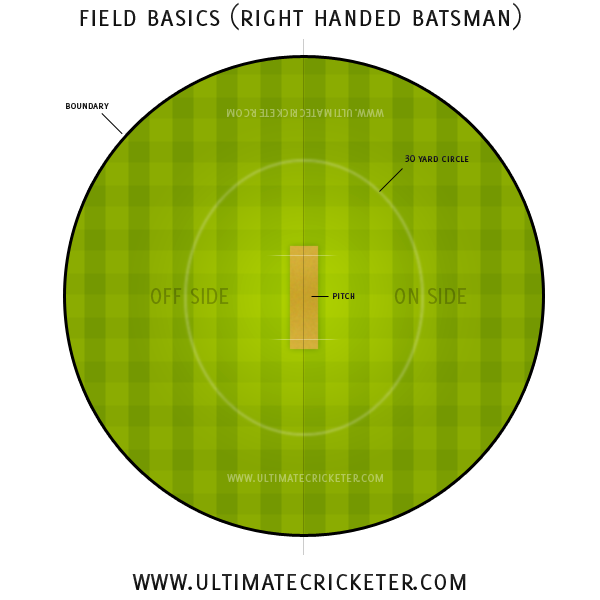

Categorization: (Total of 20 Overs)
1. Powerplay - Overs 1 - 6
2. Middle Overs - Overs 7-16
3. Death Overs - Overs 17-20

Compute the phase for each ball

In [18]:
df['phase'] = np.vectorize(find_phase)(df['ball'])

In [19]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'is_wicket', 'phase'],
      dtype='object')

Compute Total Runs Scored

In [20]:
df = compute_total_runs(df)

/Users/venkat/Documents/PR/2022Fall_projects/utils.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_runs_scored'][i] = df['total_runs_scored'][i - 1] + df['runs_off_bat'][i - 1] + df['extras'][


In [21]:
compute_team_score_and_target(df)

/Users/venkat/Documents/PR/2022Fall_projects/utils.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inn2['team_score'] = df_inn2['total_runs_scored'] + df_inn2['runs_off_bat'] + df_inn2['extras']
/Users/venkat/Documents/PR/2022Fall_projects/utils.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inn1['team_score'] = df_inn1['total_runs_scored'] + df_inn1['runs_off_bat'] + df_inn1['extras']


(       match_id season start_date                               venue  \
 0       1178418   2019 2019-04-25                        Eden Gardens   
 1       1178418   2019 2019-04-25                        Eden Gardens   
 2       1178418   2019 2019-04-25                        Eden Gardens   
 3       1178418   2019 2019-04-25                        Eden Gardens   
 4       1178418   2019 2019-04-25                        Eden Gardens   
 ...         ...    ...        ...                                 ...   
 43043   1178394   2019 2019-04-06  Rajiv Gandhi International Stadium   
 43044   1178394   2019 2019-04-06  Rajiv Gandhi International Stadium   
 43045   1178394   2019 2019-04-06  Rajiv Gandhi International Stadium   
 43046   1178394   2019 2019-04-06  Rajiv Gandhi International Stadium   
 43047   1178394   2019 2019-04-06  Rajiv Gandhi International Stadium   
 
        innings  ball           batting_team         bowling_team     striker  \
 0            1   0.1  Kolkat

In [22]:
df_inn1,df_inn2 = compute_team_score_and_target(df)

/Users/venkat/Documents/PR/2022Fall_projects/utils.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inn2['team_score'] = df_inn2['total_runs_scored'] + df_inn2['runs_off_bat'] + df_inn2['extras']
/Users/venkat/Documents/PR/2022Fall_projects/utils.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inn1['team_score'] = df_inn1['total_runs_scored'] + df_inn1['runs_off_bat'] + df_inn1['extras']


In [23]:
df_inn1.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'is_wicket', 'phase', 'total_runs_scored',
       'team_score'],
      dtype='object')

In [24]:
inn1 = df_inn1[['match_id','phase','ball','is_wicket','team_score','batting_team','bowling_team']]
inn2 = df_inn2[['match_id','phase','ball','is_wicket','team_score','target','batting_team','bowling_team']]

In [25]:
inn1 = inn1.groupby(['match_id','phase','batting_team','bowling_team']).agg(ball=('ball',np.max),team_score = ('team_score',np.max),wickets = ('is_wicket',np.sum)).reset_index()

In [26]:
inn2 = inn2.groupby(['match_id','phase','batting_team','bowling_team']).agg(ball=('ball',np.max),team_score = ('team_score',np.max),target = ('target',np.max),wickets = ('is_wicket',np.sum)).reset_index()

In [27]:
inn1['balls_bowled'] = np.vectorize(compute_balls_bowled)(inn1['ball'])
inn2['balls_bowled'] = np.vectorize(compute_balls_bowled)(inn2['ball'])

In [28]:
inn1 = compute_run_rate(inn1)
inn2 = compute_run_rate(inn2)

/Users/venkat/Documents/PR/2022Fall_projects/utils.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['phase_balls'][i] = df['balls_bowled'][i] - df['balls_bowled'][i + 1]
/Users/venkat/Documents/PR/2022Fall_projects/utils.py:211: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["phase_runs"][i] = df['team_score'][i] - df['team_score'][i + 1]
/Users/venkat/Documents/PR/2022Fall_projects/utils.py:212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

## Remove Shortened Games

In [29]:
count_phases = pd.merge(inn1.match_id.value_counts().to_frame().reset_index(),inn2.match_id.value_counts().to_frame().reset_index(),on="index")

In [30]:
index = count_phases[count_phases['match_id_x']!=count_phases['match_id_y']]['index'].to_list()

In [31]:
legit = inn2[(inn2['team_score']>inn2['target']) & (inn2['match_id'].isin(index))]['match_id'].to_list()
shortened_match_id = list(set(index) ^ set(legit))
inn1 = inn1[~inn1['match_id'].isin(shortened_match_id)]
inn2 = inn2[~inn2['match_id'].isin(shortened_match_id)]
inn1['metric'] = inn1['run_rate']*inn1["phase_runs"]
inn2['metric'] = inn2['run_rate']*inn2["phase_runs"]

Factors considered to determine whether or not a team has won a phase:
> How many runs a team scores in a phase
> How fast a team scores in a phase (run rate)

Metric: (runs * run rate)
The team which has a higher metric value in that particular phase in the game is considered to the winner of the phase.
Each phase is tagged with the winner of the phase. Phase winners are compared to the match winner to determine which phase is the most impactful.

In [32]:
final = pd.merge(inn1[['match_id','phase','batting_team','metric']],inn2[['match_id','phase','batting_team','metric']], on = ['match_id','phase'],how="outer")
final['metric_diff'] = final['metric_x'] - final['metric_y']
final['phase_winner'] = np.where(final['metric_diff']>0,final['batting_team_x'],final['batting_team_y'])

In [33]:
df.rename(columns={"start_date":"date"},inplace=True)
winner_info = pd.merge(df[['match_id','date','batting_team']].drop_duplicates().rename(columns={"batting_team":"Team1"}),match_info[["Team1","date","match_winner"]],on=['date',"Team1"],how="right")

In [34]:
df[['match_id','date','batting_team']].drop_duplicates().rename(columns={"batting_team":"Team1"})

,match_id,date,Team1
0,1178418,2019-04-25,Kolkata Knight Riders
123,1178418,2019-04-25,Rajasthan Royals
244,1178419,2019-04-26,Mumbai Indians
367,1178419,2019-04-26,Chennai Super Kings
479,1136571,2018-04-15,Rajasthan Royals
...,...,...,...
42555,1136587,2018-04-28,Mumbai Indians
42678,1136586,2018-04-27,Delhi Daredevils
42801,1136586,2018-04-27,Kolkata Knight Riders
42924,1178394,2019-04-06,Mumbai Indians


In [35]:
pd.merge(df[['match_id','date','batting_team']].drop_duplicates().rename(columns={"batting_team":"Team1"}),match_info[["Team1","date","match_winner"]],on=['date',"Team1"],how="right")[['match_id',"match_winner"]]

,match_id,match_winner
0,1178418,Rajasthan Royals
1,1178419,Mumbai Indians
2,1136571,Rajasthan Royals
3,1136570,Sunrisers Hyderabad
4,1136594,Mumbai Indians
...,...,...
168,1175364,Kings XI Punjab
169,1178395,Delhi Capitals
170,1136587,Mumbai Indians
171,1136586,Delhi Daredevils


In [36]:
df[['match_id','date','batting_team']].drop_duplicates()

,match_id,date,batting_team
0,1178418,2019-04-25,Kolkata Knight Riders
123,1178418,2019-04-25,Rajasthan Royals
244,1178419,2019-04-26,Mumbai Indians
367,1178419,2019-04-26,Chennai Super Kings
479,1136571,2018-04-15,Rajasthan Royals
...,...,...,...
42555,1136587,2018-04-28,Mumbai Indians
42678,1136586,2018-04-27,Delhi Daredevils
42801,1136586,2018-04-27,Kolkata Knight Riders
42924,1178394,2019-04-06,Mumbai Indians


In [37]:
analyze = pd.merge(final[['match_id','phase','phase_winner']],winner_info[['match_id','match_winner']],on="match_id",how="left")

In [38]:
subset = analyze[analyze.match_winner.isna()]

In [39]:
analyze['match_winner'] = np.where(analyze['match_winner'].isna()==True, analyze['match_id'],analyze.match_winner)

In [40]:
winner_dict = {1175365:"Delhi Capitals",1178424:"No Result",1178426:"Mumbai Indians",1216493:"Delhi Capitals",1216512:"Kolkata Knight Riders",1216517:"Kings XI Punjab",1216547:"Royal Challengers Bangalore"}


In [41]:
analyze['match_winner'] = analyze['match_winner'].replace(winner_dict)

In [42]:
pp = analyze[analyze['phase']=="powerplay"]
mo = analyze[analyze['phase']=="middle overs"]
do = analyze[analyze['phase']=="death overs"]

In [43]:
print("Powerplay win %",(pp[pp['phase_winner']==pp['match_winner']].shape[0])*100 / pp.shape[0])
print("Middle Overs win %",(mo[mo['phase_winner']==mo['match_winner']].shape[0])*100 / mo.shape[0])
print("Death Overs win %",(do[do['phase_winner']==do['match_winner']].shape[0])*100 / do.shape[0])

Powerplay win % 63.95348837209303
Middle Overs win % 70.17543859649123
Death Overs win % 57.64705882352941


In [58]:
pp = analyze[(analyze['phase']=="powerplay")&(analyze['match_winner']=="Chennai Super Kings")]
mo = analyze[(analyze['phase']=="middle overs")&(analyze['match_winner']=="Chennai Super Kings")]
do = analyze[(analyze['phase']=="death overs")&(analyze['match_winner']=="Chennai Super Kings")]

In [59]:
print("Powerplay win % of CSK: ",(pp[pp['phase_winner']==pp['match_winner']].shape[0])*100 / pp.shape[0])
print("Middle Overs win % of CSK: ",(mo[mo['phase_winner']==mo['match_winner']].shape[0])*100 / mo.shape[0])
print("Death Overs win % of CSK: ",(do[do['phase_winner']==do['match_winner']].shape[0])*100 / do.shape[0])

Powerplay win % of CSK:  51.851851851851855
Middle Overs win % of CSK:  70.37037037037037
Death Overs win % of CSK:  66.66666666666667


In [60]:
pp = analyze[(analyze['phase']=="powerplay")&(analyze['match_winner']=="Mumbai Indians")]
mo = analyze[(analyze['phase']=="middle overs")&(analyze['match_winner']=="Mumbai Indians")]
do = analyze[(analyze['phase']=="death overs")&(analyze['match_winner']=="Mumbai Indians")]

In [61]:
print("Powerplay win % of MI: ",(pp[pp['phase_winner']==pp['match_winner']].shape[0])*100 / pp.shape[0])
print("Middle Overs win % of MI: ",(mo[mo['phase_winner']==mo['match_winner']].shape[0])*100 / mo.shape[0])
print("Death Overs win % of MI: ",(do[do['phase_winner']==do['match_winner']].shape[0])*100 / do.shape[0])

Powerplay win % of MI:  55.55555555555556
Middle Overs win % of MI:  74.07407407407408
Death Overs win % of MI:  62.96296296296296


Mumbai Indians (MI) and Chennai Super Kings (CSK) were the two most successful teams in the seasons 2018-20. 

CSK won the  title in the year 2018 and MI won the title in the years 2019 and 2020.

It is evident that middle overs is again the most impactful phase of the game and this disproves H1 that power play is the most impactful phase. 

In [ ]:
## H1.1 Sub Hypothesis 

In [ ]:
pos_df = pd.DataFrame(columns = ["batting_position","match_id","innings","striker"])
match_id_list = list(df['match_id'].unique())
for i in match_id_list:
  pos_df = pd.concat([pos_df,compute_batting_position(df,i)])

In [ ]:
df = pd.merge(df,pos_df,how="left",on=['match_id','innings','striker'])

In [ ]:
df = pd.merge(df,pos_df.rename(columns = {"striker":"player_dismissed"}),how="left",on=['match_id','innings','player_dismissed'])

In [ ]:
df.rename(columns  = {'batting_position_x':"batting_position","batting_position_y":"player_dismissed_pos"},inplace=True)

In [ ]:
summary = get_batting_data(df)

In [ ]:
summary["BASRA"] = summary['Batting Average'] + summary['Batting Strike Rate']

In [ ]:
summary

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.barplot(data = summary, x = "Player", y = "BASRA", palette="rocket")
plt.xlabel("Batting Position")
plt.title("Batting Position vs BASRA")
plt.show()

This graph shows that the BASRA of batters from positions 1 to 7 is almost similar and hence their contributions are similar. This means that the value of the wicket of a top order batter is not more than that of middle and lower order batters. The assumption made in the journal article has been disproved and the feature wicket was not considered in evaluating the performance of teams in Hypothesis 1.

# Results

The assumption made in the journal article that top order batters contribute more to the team than middle and lower order batters was disproved through sub hypothesis H1.1. 

Using the runs * run rate metric, the winners of each phase in each of the games from the year 2018-20 were identified.

Upon identifying phase winners, conditional probability of a team winning the match given that they have won the phase was computed.

It was identified that teams which win the middle overs phase went on to win 70.17% of the games which is the highest among all the phases.

In the time period considered, the phase wise wins of the title winners was also analyzed to see which phase has been the most impactful in determining the team's success. 

It was again proved that the middle overs was the most impactful phase where Chennai Super Kings won the game 70.37% of the times they won the middle overs and Mumbai Indians won the game 74.07% of the times they won the middle overs. 

Using the runs * run rate metric, the winners of each phase in each of the games from the year 2018-20 were identified.

Upon identifying phase winners, conditional probability of a team winning the match given that they have won the phase was computed.

It was identified that teams which win the middle overs phase went on to win 70.17% of the games which is the highest among all the phases.

In the time period considered, the phase wise wins of the title winners was also analyzed to see which phase has been the most impactful in determining the team's success. 

It was again proved that the middle overs was the most impactful phase where Chennai Super Kings won the game 70.37% of the times they won the middle overs and Mumbai Indians won the game 74.07% of the times they won the middle overs. 